# Value and Policy Iteration 

- [x] Small Gridworld (lecture 3)
- [x] Teleportation (lecture 1)
- [ ] Jack's Car Rental (lecture 3)

## Case 1: Small Gridworld
Need to go to top-left or bottom right. Each move costs 1 point.

In [32]:
import numpy as np
np.set_printoptions(precision=1)

grid_size = 4
terminal_states = [(0,0), (grid_size-1, grid_size-1)]

gamma = 1
reward = -1

values = np.zeros((grid_size, grid_size))
policy = 0.25 * np.ones((grid_size, grid_size, 4))  # LRUD

for k in range(200):
    new_values = np.zeros_like(values)

    # Value Update
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) in terminal_states:
                new_values[i, j] = 0.
                continue

            for action, (i_new, j_new) in enumerate([(i-1,j), (i+1,j), (i,j-1), (i,j+1)]):
                if i_new < 0 or i_new >= grid_size or j_new < 0 or j_new >= grid_size:
                    i_new, j_new = i, j
                
                returns = values[i_new, j_new]
                new_values[i, j] += policy[i, j, action] * (reward + gamma * returns)

    values = new_values

print(values)

[[  0.      -13.99976 -19.99964 -21.9996 ]
 [-13.99976 -17.99968 -19.99964 -19.99964]
 [-19.99964 -19.99964 -17.99968 -13.99976]
 [-21.9996  -19.99964 -13.99976   0.     ]]


In [34]:
np.set_printoptions(precision=4)

values = np.zeros((grid_size, grid_size))
policy = 0.25 * np.ones((grid_size, grid_size, 4))  # LRUD

for k in range(5):
    print(values)
    
    new_values = np.zeros_like(values)

    # Value Update
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) in terminal_states:
                new_values[i, j] = 0.
                continue

            for action, (i_new, j_new) in enumerate([(i-1,j), (i+1,j), (i,j-1), (i,j+1)]):
                if i_new < 0 or i_new >= grid_size or j_new < 0 or j_new >= grid_size:
                    i_new, j_new = i, j
                
                returns = values[i_new, j_new]
                new_values[i, j] += policy[i, j, action] * (reward + gamma * returns)

    values = new_values
    # continue

    # break

    # Policy Update
    new_policy = np.zeros_like(policy)

    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) in terminal_states:
                new_policy[i, j] = 0.0
                continue
            
            next_values = np.zeros(4)
            for action, (i_new, j_new) in enumerate([(i-1,j), (i+1,j), (i,j-1), (i,j+1)]):
                if i_new < 0 or i_new >= grid_size or j_new < 0 or j_new >= grid_size:
                    next_values[action] = -np.inf
                    continue

                next_values[action] = values[i_new, j_new]

            best_actions = np.where(next_values == next_values.max())[0]
            for a in best_actions:
                new_policy[i, j, a] = 1/len(best_actions)

    policy = new_policy

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]
[[ 0. -1. -2. -2.]
 [-1. -2. -2. -2.]
 [-2. -2. -2. -1.]
 [-2. -2. -1.  0.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


Value iteration needs a lot less time when policy is greedily updated

## Case 2: Teleportation!

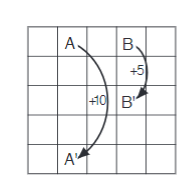 \
Reward at each step = 0 \
Reward for hitting the wall = 0

In [65]:
import numpy as np
np.set_printoptions(precision=1)

grid_size = 5

special_states = [(1,0), (3,0)]

special_jumps = {
    (1,0): (1, grid_size-1),
    (3,0): (3, 2)
}

special_rewards = {
    (1,0): 10,
    (3,0): 5
}

gamma = 0.9

values = np.zeros((grid_size, grid_size))
policy = 0.25 * np.ones((grid_size, grid_size, 4))  # LRUD

for x, y in special_states:
    values[x, y] = special_rewards[(x, y)]

for k in range(500):
    # print('-'*10, f'k = {k}', '-'*10)
    # print(values.T)

    new_values = np.zeros_like(values)

    # Value Update
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) in special_states:
                new_values[i, j] = special_rewards[(i,j)] + gamma * values[special_jumps[(i,j)]]
                continue

            for action, (i_new, j_new) in enumerate([(i-1,j), (i+1,j), (i,j-1), (i,j+1)]):
                if (i_new < 0 or i_new >= grid_size or j_new < 0 or j_new >= grid_size):
                    returns = values[i, j]
                    reward = -1
                else:
                    returns = values[i_new, j_new]
                    reward = 0
                    # if (i_new, j_new) in special_states:
                    #     reward = special_rewards[i_new, j_new]

                new_values[i, j] += policy[i, j, action] * (reward + gamma * returns)

    mse = np.mean((new_values - values)**2)
    # print(f'MSE = {mse}')
    if mse < 1e-12:
        break


    values = new_values

print(k)
print(values.T)

98
[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


In [64]:
import numpy as np
np.set_printoptions(precision=1)

grid_size = 5

special_states = [(1,0), (3,0)]

special_jumps = {
    (1,0): (1, grid_size-1),
    (3,0): (3, 2)
}

special_rewards = {
    (1,0): 10,
    (3,0): 5
}

gamma = 0.9

values = np.zeros((grid_size, grid_size))
policy = 0.25 * np.ones((grid_size, grid_size, 4))  # LRUD

for x, y in special_states:
    values[x, y] = special_rewards[(x, y)]

for k in range(500):
    # print('-'*10, f'k = {k}', '-'*10)
    # print(values.T)

    new_values = np.zeros_like(values)

    # Value Update
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) in special_states:
                new_values[i, j] = special_rewards[(i,j)] + gamma * values[special_jumps[(i,j)]]
                continue

            for action, (i_new, j_new) in enumerate([(i-1,j), (i+1,j), (i,j-1), (i,j+1)]):
                if (i_new < 0 or i_new >= grid_size or j_new < 0 or j_new >= grid_size):
                    returns = values[i, j]
                    reward = -1
                else:
                    returns = values[i_new, j_new]
                    reward = 0
                    # if (i_new, j_new) in special_states:
                    #     reward = special_rewards[i_new, j_new]

                new_values[i, j] += policy[i, j, action] * (reward + gamma * returns)

    mse = np.mean((new_values - values)**2)
    # print(f'MSE = {mse}')
    if mse < 1e-12:
        break


    values = new_values

    # Policy Update
    new_policy = np.zeros_like(policy)

    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) in special_states:
                new_policy[i, j] = 0.0
                continue
            
            next_values = np.zeros(4)
            for action, (i_new, j_new) in enumerate([(i-1,j), (i+1,j), (i,j-1), (i,j+1)]):
                if i_new < 0 or i_new >= grid_size or j_new < 0 or j_new >= grid_size:
                    next_values[action] = -np.inf
                    continue

                next_values[action] = values[i_new, j_new]

            best_actions = np.where(next_values == next_values.max())[0]
            new_policy[i, j, best_actions] = 1
            new_policy[i, j] /= new_policy[i, j].sum()

    policy = new_policy

print(k)
print(values.T)

142
[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]
